# Visualisierung als Netzwerk

In der vorherigen Einheit wurden Topics für einzelne Dokumente ausgegeben. Das ist zwar durchaus aufschlussreich, ist bei großen Corpora aber ein zeitaufwändiger Prozess. Nicht nur zeitökonomisch, auch analytisch kann es Gründe geben, anders auf Topic Models zu gucken: Wenn es darum geht, größere Strukturen sichtbar zu machen, ist eine abstraktere Betrachtung der Ergebnisse interessant.

Visualisierungen können helfen, Strukturen in großen Datenmengen sichtbar zu machen. Sie sind dabei nicht nur die Repräsentation eines Analyseergebnisses, sondern Teil des Analyseprozesses selbst. Hierfür gibt es den Begriff der *visual analytics*. Die Informationen, die ein Topic Model enthält, können mit Hilfe von Visualisierungen sichtbar gemacht werden. Eine Möglichkeit ist hierbei die Darstellung als Netzwerk.

Für eine interessante Diskussion unterschiedlicher Visualisierungsmöglichkeiten siehe auch [diesen Blogpost](http://tedunderwood.com/2012/11/11/visualizing-topic-models/).

Zunächst wird das zuvor erstellt Topic Model wieder geladen:

In [1]:
from cPickle import load

with open('../07_Topic_Modeling/topicmodel20.pickle', 'rb') as picklefile:
    ldamodel = load(picklefile)

Die zentralen Informationen des Modells sind in zwei Matrizen gespeichert:

In [2]:
ldamodel.topic_word_.shape

(20, 10346)

In [3]:
ldamodel.doc_topic_.shape

(614, 20)

Die Matrizen beinhalten die Beziehungen zwischen Topics und Wörtern (welche Wörter gehören zu welchem Topic?) sowie Dokumenten und Topics (welche Topics gehören zu welchem Dokument?). Dabei gibt es keine Trennlinie, die eine klare Antwort auf diese Fragen gibt, die Werte in den Matrizen sind vielmehr graduell.

Für die spätere Verwendung lässt sich aus den Dimensionen der Matrizen die Anzahl der Topics, Wörter und Dokumente ermitteln:

In [4]:
n_topics, n_words = ldamodel.topic_word_.shape
n_docs, n_topics = ldamodel.doc_topic_.shape

Es ist zu vermuten, dass der Zusammenhang von Dokumenten und Topics nicht ganz zufällig ist. Es könnte interessant sein, zu sehen, welche Topics sich etwa ähnlich auf die Dokumente verteilen. Wenn zwei Topics eine ähnliche Dokumentzuordnung aufweisen, ist zu vermuten, dass sie auch inhaltlich einen Zusammenhang haben.

Ein relativ simples Verfahren wäre etwa, sich für jedes Dokument die drei (vier, fünf) wichtigsten Topics ausgeben zu lassen und diese als miteinander verbunden zu verstehen. Daraus ließe sich ein Netzwerk von Topics erstellen, dessen Kanten die Zuordnung zu gleichen Dokumenten wären.

Eine andere Möglichkeit ist ein statistischer Ansatz. So lassen sich aus den Dokumentverteilungen Korrelationen berechnen: Die doc_topic-Tabelle enthält Dokumente als Zeilen und Topics als Spalten. Wenn man nun paarweise die Korrelationen zwischen Topics (Spalten) berechnet, lässt sich dies als Hinweis auf die Beziehungsstärke zweier Topics verstehen. Dieses Verfahren nutzt mehr Informationen als der erste Ansatz (nicht nur die ersten drei Topics), und kann Beziehungen gradueller darstellen (nämlich als Korrelationsstärke).

Ein `pandas.DataFrame` stellt eine komfortable Möglichkeit bereit, Korrelationen zwischen Spalten zu berechnen. Hier wird standardmäßig Pearson’s R verwendet. Das Ergebnis ist eine quadratische Matrix von Topic zu Topic, die die Korrelationsstärke aller Paare beinhaltet.

In [5]:
import pandas as pd
doc_topic = pd.DataFrame(ldamodel.doc_topic_)
topic_correlations = doc_topic.corr()
topic_correlations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.240488,-0.235736,-0.233907,-0.155010,0.073751,0.319757,-0.236095,-0.128879,0.057253,0.069757,-0.109916,-0.159303,0.184835,-0.111101,0.051682,-0.034295,0.151951,0.077930,-0.033813
1,-0.240488,1.000000,0.061707,-0.209117,-0.070316,-0.128018,-0.092926,0.154205,-0.091998,-0.059900,-0.183065,-0.196961,-0.106808,-0.287320,0.119700,-0.129344,-0.114750,-0.079504,-0.067454,-0.089174
2,-0.235736,0.061707,1.000000,-0.314236,0.142806,-0.192643,-0.199044,-0.015310,0.039074,-0.172780,-0.291848,-0.300100,-0.197728,-0.471223,0.036906,-0.005109,-0.207350,-0.068967,0.017309,-0.091844
3,-0.233907,-0.209117,-0.314236,1.000000,-0.202424,0.062739,-0.120000,-0.255410,-0.141374,-0.071428,0.109886,0.510130,0.255557,0.433963,-0.181590,0.025340,0.498237,-0.111729,-0.148190,-0.019979
4,-0.155010,-0.070316,0.142806,-0.202424,1.000000,-0.131101,-0.135250,-0.056783,0.219947,-0.104511,-0.187800,-0.179504,-0.125529,-0.290484,-0.066710,-0.012124,-0.116895,-0.077563,0.030472,-0.081852
5,0.073751,-0.128018,-0.192643,0.062739,-0.131101,1.000000,-0.089307,-0.163260,-0.096853,0.001530,0.092732,0.024347,-0.005125,0.155804,-0.101892,0.010605,0.031415,-0.007543,-0.095382,-0.000211
6,0.319757,-0.092926,-0.199044,-0.120000,-0.135250,-0.089307,1.000000,-0.131652,-0.122269,-0.080258,-0.115662,0.111898,-0.152621,0.321647,-0.102148,-0.018155,-0.071944,0.001572,0.014486,-0.124249
7,-0.236095,0.154205,-0.015310,-0.255410,-0.056783,-0.163260,-0.131652,1.000000,-0.137578,0.185675,-0.254794,-0.311383,0.237230,-0.330774,0.255114,-0.214128,-0.194228,-0.055369,-0.034705,-0.046849
8,-0.128879,-0.091998,0.039074,-0.141374,0.219947,-0.096853,-0.122269,-0.137578,1.000000,-0.089616,-0.089903,-0.120842,-0.123754,-0.192877,-0.080858,0.009507,0.019488,-0.086913,0.281763,-0.093953
9,0.057253,-0.059900,-0.172780,-0.071428,-0.104511,0.001530,-0.080258,0.185675,-0.089616,1.000000,-0.054176,-0.141247,0.077633,-0.056631,-0.052369,-0.093180,-0.011973,-0.053306,-0.069815,0.033830


Eine solche Tabelle lässt sich direkt als Netzwerk interpretieren: In der Netzwerktheorie ist eine quadratische Matrix eine Repräsentation der Kanten. Die Zellwerte stellen dann das Kantengewicht dar.

Da in dieser Matrix jedoch alle Topics miteinander verbunden sind, ist es nützlich, zuvor etwas zu filtern. Hier werden alle negativen oder sehr schwachen Korrelationen gelöscht, die entsprechenden Topics sind im Netzwerk also nicht verbunden.

In [6]:
topic_correlations[topic_correlations < 0.1] = 0

Die Diagonale der Korrelationsmatrix ist per Definition 1. Da im Netzwerk aber Beziehungen der Knoten zu sich selbst (sogenannte *loops*) in diesem Fall nicht sinnvoll sind, werden sie ebenfalls gelöscht.

Ein `DataFrame` erlaubt dies nicht direkt, aber numpy stellt hierfür eine Funktion bereit. Sie funktioniert aber nur mit einer Matrix, nicht mit einem DataFrame. Hier hilft ein Kniff: `DataFrame.values` enthält eine Matrix-Repräsentation des DataFrame.

In [7]:
import numpy as np

np.fill_diagonal(topic_correlations.values, 0)
topic_correlations

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184835,0.000000,0.000000,0.000000,0.151951,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119700,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.142806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.109886,0.510130,0.255557,0.433963,0.000000,0.000000,0.498237,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.142806,0.000000,0.000000,0.000000,0.000000,0.000000,0.219947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.319757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111898,0.000000,0.321647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.154205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185675,0.000000,0.000000,0.237230,0.000000,0.255114,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.219947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281763,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Die solchermaßen ausgedünnte Matrix kann direkt als Netzwerk visualisiert werden.

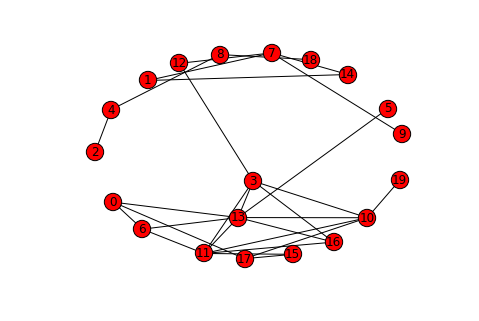

In [9]:
%matplotlib inline
import networkx as nx

topic_graph = nx.Graph(topic_correlations.values)
nx.draw(topic_graph, with_labels=True)

Eine erste Betrachtung zeigt, dass es hier zwei untereinander kaum verbundene Cluster gibt. Betrachtet man die entsprechenden Topics, lassen sich die Cluster grob einem kulturpolitischen Feld (oben) und einem wirtschaftspolitischen Feld (unten) zurechnen.

In ähnlicher Weise können auch die Korrelationen nicht von Topics, sondern von Dokumenten berechnet und visualisiert werden. Zwei Dokumente können dann als ähnlich angesehen werden, wenn sie eine ähnliche Topic-Verteilung aufweisen.

Die Dokumentkorrelationen erhält man, wenn man die doc_topic-Tabelle transponiert, bevor man die Korrelationen berechnet. Das Ergebnis ist dann eine quadratische Matrix von Dokumenten.

In [10]:
doc_correlations = doc_topic.transpose().corr()

doc_correlations[doc_correlations < .9] = 0
np.fill_diagonal(doc_correlations.values, 0)
doc_correlations.shape

(614, 614)

Um das Netzwerk leichter interpretieren zu können, werden die Knoten des Netzwerkes entsprechend der Dokumenttitel benannt.

In [12]:
import pandas as pd

data = pd.read_csv("../Daten/reden.csv", parse_dates=['date'], encoding='utf-8')
titles = data['title']

doc_graph = nx.Graph(doc_correlations.values)
doc_graph = nx.relabel_nodes(doc_graph, titles)

Das Netzwerk ist mit 614 Knoten zu groß, um es ohne weiteres mit den Möglichkeiten von networkx zu zeichnen. Für die explorative Analyse bietet sich ein Programm wie [Gephi](http://gephi.org/) an. Daher wird das Netzwerk in eine GraphML-Datei exportiert und in Gephi weiter analysiert.

In [13]:
nx.write_graphml(doc_graph, 'docs.graphml')

In Gephi wurden nur zwei Schritte vorgenommen: Ein Layout wurde mit dem ForceAtlas-Algorithmus berechnet, und es wurden Communities eng zusammenhängender Dokumente ermittelt. (Dieser zweite Schritt wäre ebenso mit dem Paket python-louvain möglich gewesen, das den gleichen Algorithmus implementiert. Dafür siehe die Einheit zu »Text als Netzwerk«.)

Um das Ergebnis leicht im Notebook anzeigen zu können, wurde es mit dem Sigma-Plugin aus Gephi in eine HTML-Datei exportiert, die hier eingebunden wird.

In [14]:
from IPython.core.display import HTML

HTML('<iframe src="doc_network/index.html" width="100%" height="600" seamless>Netzwerk kann nicht angezeigt werden.</iframe>')

Bei Betrachtung der einzelnen Cluster zeigt sich insgesamt ein relativ deutlicher inhaltlicher Zusammenhang. So sind etwa die Dokumente des lindgrünen Clusters 6 (oben in der Mitte) mit Kultur und insbesondere mit Museen und ähnlichen Institutionen befasst, während das violette Cluster 1 (unten links) Themen aus den Bereichen Umwelt, Energie, Nachhaltigkeit beinhaltet.